In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

## Earth Revolution

<font  face=Times color=darkblue size=3> For the planet revolution due to the gravitational fore $\vec F=\frac{-GMm}{r^2}\hat r\ $, the equation of motion is: $\frac{d^2\vec r}{dt^2}=-\frac{\mu}{r^3}\vec r$, where $\mu=G(M+m)\approx GM$. We can write this in two directions and get two differential equations: $\ddot{r}-r\dot{\theta}^2=-\frac{GM}{r^2}$ and $r\ddot{\theta}+2\dot{r}\dot{\theta}=0$.
    <br>Now we denote $u=\frac{1}{r}$, now the angular velocity is: $$\dot{\theta}=\frac{l}{mr^2}=\frac{lu^2}{m},\  {\rm where}\ \ l\ \ {\rm is\ the\ angular\ momentum}. $$ And there is a differential relationship: $$\frac{d}{dt}=\dot{\theta}\frac{d}{d\theta}=\frac{lu^2}{m}\frac{d}{d\theta}.$$ So that, $$\dot{r}=\frac{lu^2}{m}\frac{d}{d\theta}\frac{1}{u}=-\frac{l}{m}\frac{du}{d\theta}, \ \ \ddot{r}=\frac{lu^2}{m}\frac{d\dot{r}}{d\theta}=-\frac{l^2u^2}{m^2}\frac{du^2}{d\theta^2}.$$ Take these into $\ddot{r}-r\dot{\theta}^2=-\frac{GM}{r^2}$: $$\frac{d^2u}{d\theta^2}+u=\frac{GMm^2}{l^2}. $$ To solve this, we first list a particular solution $u=\frac{GMm^2}{l^2}$, and then solve $\frac{d^2u}{d\theta^2}+u=0$, and get $u=C\cos{\theta-\theta_0}$, where $C$ and $\theta_0$ are constants. Therefore, the general solution is: $$\frac{1}{r}=\frac{GMm^2}{l^2}(1+e\cos{\theta}).$$ $e$ is the eccentricity and it is an equation for conic section, which is the content of Kepler's 1st law.
    <br><br> To prove Kepler's 2nd law, we have: $$\dot{\vec r}=\dot{r}\hat{r}+r\dot{\theta}\hat{\theta},\ \ \ddot{\vec r}=(\ddot{r}-r\dot{\theta}^2)\hat{r}+(r\ddot{\theta}+2\dot{r}\dot{\theta})\hat{\theta}. $$ Combine it with $\ddot{\vec r}=-G\frac{M}{r^2}\hat r$, then get: $$\ddot{r}-r\dot{\theta}^2=-G\frac{M}{r^2},\ \ \ r\ddot{\theta}+2\dot{r}\dot{\theta}=0.$$ As $l=mr^2\dot{\theta}$ and the mass of the planet is a constant: $$\dot{l}=mr(r\ddot{\theta}+2\dot{r}\dot{\theta})=0.$$ The areas that the line joining the planet and the Sun sweeps is: $$\Delta A=\int_{t_1}^{t_2}=\frac{1}{2}\cdot r\cdot r\dot{\theta}\cdot dt=\int_{t_1}^{t_2}\frac{l}{2m}dt.$$ Since we have proved the angular momentum is constant, the areas of equal time are also constants, which supports the 2nd law.
    <br><br>We already know that the earth moves in an ellipse aroung the sun, and now we can test the methods introduced before to numerically solve the differential equations and plot the trajectory to see the performance of the methods (here we consider the best Runge-Kutta method, the velocity Verlet method and the worst Euler method.). Moreover, we use the numerical results to prove the Kepler's 2nd law.
    <br><br>
    The initial condition is: $x=a(1-e)$, $y=0$, $v_x=0$, $v_y=\sqrt{\mu(1+e)/[a(1-e)]}$. we take $\mu=2.958\times 10^{-4}$, semi-major axis $a=1.00000011$, and eccentricity $e=0.01671022$. We take the unit of $t$ to be 1 day.
    

In [2]:
initial_x=1.00000011*(1-0.01671022)
initial_vy=np.sqrt(2.958*np.power(0.1,4)*(1+0.01671022)/(1.00000011*(1-0.01671022)))
mu=2.958*np.power(0.1,4)

### Euler Method

In [3]:
tau=1
x_eu=[initial_x]
y_eu=[0]
vx_eu=[0]
vy_eu=[initial_vy]
t_eu=[0]

In [4]:
for i in range(1,400):
    t_eu.append(tau*i)
    x_eu.append(x_eu[i-1]+tau*vx_eu[i-1])
    ax_here= (-mu/np.power((x_eu[i-1]**2+y_eu[i-1]**2),1.5))*x_eu[i-1]
    vx_eu.append(vx_eu[i-1]+tau*ax_here)
    y_eu.append(y_eu[i-1]+tau*vy_eu[i-1])
    ay_here= (-mu/np.power((x_eu[i-1]**2+y_eu[i-1]**2),1.5))*y_eu[i-1]
    vy_eu.append(vy_eu[i-1]+tau*ay_here)

In [5]:
tau=0.1
x_eu1=[initial_x]
y_eu1=[0]
vx_eu1=[0]
vy_eu1=[initial_vy]
t_eu1=[0]

In [6]:
for i in range(1,4000):
    t_eu1.append(tau*i)
    x_eu1.append(x_eu1[i-1]+tau*vx_eu1[i-1])
    ax_here= (-mu/np.power((x_eu1[i-1]**2+y_eu1[i-1]**2),1.5))*x_eu1[i-1]
    vx_eu1.append(vx_eu1[i-1]+tau*ax_here)
    y_eu1.append(y_eu1[i-1]+tau*vy_eu1[i-1])
    ay_here= (-mu/np.power((x_eu1[i-1]**2+y_eu1[i-1]**2),1.5))*y_eu1[i-1]
    vy_eu1.append(vy_eu1[i-1]+tau*ay_here)

In [7]:
tau=4
x_eu2=[initial_x]
y_eu2=[0]
vx_eu2=[0]
vy_eu2=[initial_vy]
t_eu2=[0]

In [8]:
for i in range(1,100):
    t_eu2.append(tau*i)
    x_eu2.append(x_eu2[i-1]+tau*vx_eu2[i-1])
    ax_here= (-mu/np.power((x_eu2[i-1]**2+y_eu2[i-1]**2),1.5))*x_eu2[i-1]
    vx_eu2.append(vx_eu2[i-1]+tau*ax_here)
    y_eu2.append(y_eu2[i-1]+tau*vy_eu2[i-1])
    ay_here= (-mu/np.power((x_eu2[i-1]**2+y_eu2[i-1]**2),1.5))*y_eu2[i-1]
    vy_eu2.append(vy_eu2[i-1]+tau*ay_here)

Text(0, 0.5, 'y')

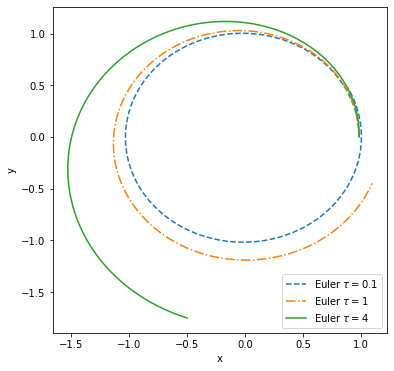

In [9]:
plt.figure(figsize=(6,6))
plt.plot(x_eu1,y_eu1,'--',label=r'Euler $\tau=0.1$')
plt.plot(x_eu,y_eu,'-.',label=r'Euler $\tau=1$')
plt.plot(x_eu2,y_eu2,'-',label=r'Euler $\tau=4$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

<font  face=Times color=darkblue size=3> We have simulated 3 values of $\tau$ and totally 400 days, and again see that that the error of Euler method increases with time and the larger the time-step, the larger the error.

### Velocity Verlet Method

In [10]:
tau=0.1
x_vv_tauP1=[initial_x]
y_vv_tauP1=[0]
vx_vv_tauP1=[0]
vy_vv_tauP1=[initial_vy]
t_vv_tauP1=[0]


In [11]:
for i in range(1,4000):
    t_vv_tauP1.append(tau*i)
    ax_vv = (-mu/np.power((x_vv_tauP1[i-1]**2+y_vv_tauP1[i-1]**2),1.5))*x_vv_tauP1[i-1]
    ay_vv = (-mu/np.power((x_vv_tauP1[i-1]**2+y_vv_tauP1[i-1]**2),1.5))*y_vv_tauP1[i-1]
    x_vv_tauP1.append(x_vv_tauP1[i-1]+tau*vx_vv_tauP1[i-1]+0.5*np.power(tau,2)*ax_vv)
    y_vv_tauP1.append(y_vv_tauP1[i-1]+tau*vy_vv_tauP1[i-1]+0.5*np.power(tau,2)*ay_vv)
    ax_vvi = (-mu/np.power((x_vv_tauP1[i]**2+y_vv_tauP1[i]**2),1.5))*x_vv_tauP1[i]
    ay_vvi = (-mu/np.power((x_vv_tauP1[i]**2+y_vv_tauP1[i]**2),1.5))*y_vv_tauP1[i]
    vx_vv_tauP1.append(vx_vv_tauP1[i-1]+0.5*tau*(ax_vv+ax_vvi))
    vy_vv_tauP1.append(vy_vv_tauP1[i-1]+0.5*tau*(ay_vv+ay_vvi))

In [12]:
tau=1
x_vv_tau1=[initial_x]
y_vv_tau1=[0]
vx_vv_tau1=[0]
vy_vv_tau1=[initial_vy]
t_vv_tau1=[0]
for i in range(1,400):
    t_vv_tau1.append(tau*i)
    ax_vv = (-mu/np.power((x_vv_tau1[i-1]**2+y_vv_tau1[i-1]**2),1.5))*x_vv_tau1[i-1]
    ay_vv = (-mu/np.power((x_vv_tau1[i-1]**2+y_vv_tau1[i-1]**2),1.5))*y_vv_tau1[i-1]
    x_vv_tau1.append(x_vv_tau1[i-1]+tau*vx_vv_tau1[i-1]+0.5*np.power(tau,2)*ax_vv)
    y_vv_tau1.append(y_vv_tau1[i-1]+tau*vy_vv_tau1[i-1]+0.5*np.power(tau,2)*ay_vv)
    ax_vvi = (-mu/np.power((x_vv_tau1[i]**2+y_vv_tau1[i]**2),1.5))*x_vv_tau1[i]
    ay_vvi = (-mu/np.power((x_vv_tau1[i]**2+y_vv_tau1[i]**2),1.5))*y_vv_tau1[i]
    vx_vv_tau1.append(vx_vv_tau1[i-1]+0.5*tau*(ax_vv+ax_vvi))
    vy_vv_tau1.append(vy_vv_tau1[i-1]+0.5*tau*(ay_vv+ay_vvi))


In [13]:
tau=4
x_vv_tau4=[initial_x]
y_vv_tau4=[0]
vx_vv_tau4=[0]
vy_vv_tau4=[initial_vy]
t_vv_tau4=[0]
for i in range(1,100):
    t_vv_tau4.append(tau*i)
    ax_vv = (-mu/np.power((x_vv_tau4[i-1]**2+y_vv_tau4[i-1]**2),1.5))*x_vv_tau4[i-1]
    ay_vv = (-mu/np.power((x_vv_tau4[i-1]**2+y_vv_tau4[i-1]**2),1.5))*y_vv_tau4[i-1]
    x_vv_tau4.append(x_vv_tau4[i-1]+tau*vx_vv_tau4[i-1]+0.5*np.power(tau,2)*ax_vv)
    y_vv_tau4.append(y_vv_tau4[i-1]+tau*vy_vv_tau4[i-1]+0.5*np.power(tau,2)*ay_vv)
    ax_vvi = (-mu/np.power((x_vv_tau4[i]**2+y_vv_tau4[i]**2),1.5))*x_vv_tau4[i]
    ay_vvi = (-mu/np.power((x_vv_tau4[i]**2+y_vv_tau4[i]**2),1.5))*y_vv_tau4[i]
    vx_vv_tau4.append(vx_vv_tau4[i-1]+0.5*tau*(ax_vv+ax_vvi))
    vy_vv_tau4.append(vy_vv_tau4[i-1]+0.5*tau*(ay_vv+ay_vvi))

Text(0, 0.5, 'y')

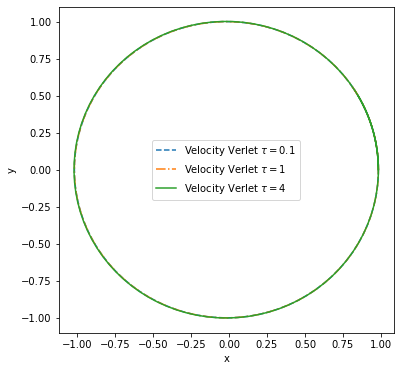

In [14]:
plt.figure(figsize=(6,6))
plt.plot(x_vv_tauP1,y_vv_tauP1,'--',label=r'Velocity Verlet $\tau=0.1$')
plt.plot(x_vv_tau1,y_vv_tau1,'-.',label=r'Velocity Verlet $\tau=1$')
plt.plot(x_vv_tau4,y_vv_tau4,'-',label=r'Velocity Verlet $\tau=4$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

### 4-th Order Runge-Kutta Method

In [30]:
tau=4
x_rk=[initial_x]
y_rk=[0]
vx_rk=[0]
vy_rk=[initial_vy]
t_rk=[0]

In [31]:
for i in range(1,100):
    t_rk.append(tau*i)
    k1x=tau*vx_rk[i-1]
    k1y=tau*vy_rk[i-1]
    ax_here1= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*x_rk[i-1]
    ay_here1= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*y_rk[i-1]
    l1x=tau*ax_here1
    l1y=tau*ay_here1
    k2x=tau*(vx_rk[i-1]+0.5*l1x)
    k2y=tau*(vy_rk[i-1]+0.5*l1y)
    ax_here2= (-mu/np.power(((x_rk[i-1]+0.5*k1x)**2+(y_rk[i-1]+0.5*k1y)**2),1.5))*(x_rk[i-1]+0.5*k1x)
    ay_here2= (-mu/np.power(((x_rk[i-1]+0.5*k1x)**2+(y_rk[i-1]+0.5*k1y)**2),1.5))*(y_rk[i-1]+0.5*k1y)
    l2x=tau*ax_here2
    l2y=tau*ay_here2
    k3x=tau*(vx_rk[i-1]+0.5*l2x)
    k3y=tau*(vy_rk[i-1]+0.5*l2y)
    ax_here3= (-mu/np.power(((x_rk[i-1]+0.5*k2x)**2+(y_rk[i-1]+0.5*k2y)**2),1.5))*(x_rk[i-1]+0.5*k2x)
    ay_here3= (-mu/np.power(((x_rk[i-1]+0.5*k2x)**2+(y_rk[i-1]+0.5*k2y)**2),1.5))*(y_rk[i-1]+0.5*k2y)
    l3x=tau*ax_here3
    l3y=tau*ay_here3
    k4x=tau*(vx_rk[i-1]+l3x)
    k4y=tau*(vy_rk[i-1]+l3y)
    ax_here4= (-mu/np.power(((x_rk[i-1]+k3x)**2+(y_rk[i-1]+k3y)**2),1.5))*(x_rk[i-1]+k3x)
    ay_here4= (-mu/np.power(((x_rk[i-1]+k3x)**2+(y_rk[i-1]+k3y)**2),1.5))*(y_rk[i-1]+k3y)
    l4x=tau*ax_here4
    l4y=tau*ay_here4
    x_rk.append(x_rk[i-1]+(1/6)*(k1x+2*k2x+2*k3x+k4x))
    vx_rk.append(vx_rk[i-1]+(1/6)*(l1x+2*l2x+2*l3x+l4x))
    y_rk.append(y_rk[i-1]+(1/6)*(k1y+2*k2y+2*k3y+k4y))
    vy_rk.append(vy_rk[i-1]+(1/6)*(l1y+2*l2y+2*l3y+l4y))
    

In [32]:
xrk_4=copy.deepcopy(x_rk)
yrk_4=copy.deepcopy(y_rk)

In [33]:
tau=20
x_rk=[initial_x]
y_rk=[0]
vx_rk=[0]
vy_rk=[initial_vy]
t_rk=[0]

In [34]:
for i in range(1,20):
    t_rk.append(tau*i)
    k1x=tau*vx_rk[i-1]
    k1y=tau*vy_rk[i-1]
    ax_here1= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*x_rk[i-1]
    ay_here1= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*y_rk[i-1]
    l1x=tau*ax_here1
    l1y=tau*ay_here1
    k2x=tau*(vx_rk[i-1]+0.5*l1x)
    k2y=tau*(vy_rk[i-1]+0.5*l1y)
    ax_here2= (-mu/np.power(((x_rk[i-1]+0.5*k1x)**2+(y_rk[i-1]+0.5*k1y)**2),1.5))*(x_rk[i-1]+0.5*k1x)
    ay_here2= (-mu/np.power(((x_rk[i-1]+0.5*k1x)**2+(y_rk[i-1]+0.5*k1y)**2),1.5))*(y_rk[i-1]+0.5*k1y)
    l2x=tau*ax_here2
    l2y=tau*ay_here2
    k3x=tau*(vx_rk[i-1]+0.5*l2x)
    k3y=tau*(vy_rk[i-1]+0.5*l2y)
    ax_here3= (-mu/np.power(((x_rk[i-1]+0.5*k2x)**2+(y_rk[i-1]+0.5*k2y)**2),1.5))*(x_rk[i-1]+0.5*k2x)
    ay_here3= (-mu/np.power(((x_rk[i-1]+0.5*k2x)**2+(y_rk[i-1]+0.5*k2y)**2),1.5))*(y_rk[i-1]+0.5*k2y)
    l3x=tau*ax_here3
    l3y=tau*ay_here3
    k4x=tau*(vx_rk[i-1]+l3x)
    k4y=tau*(vy_rk[i-1]+l3y)
    ax_here4= (-mu/np.power(((x_rk[i-1]+k3x)**2+(y_rk[i-1]+k3y)**2),1.5))*(x_rk[i-1]+k3x)
    ay_here4= (-mu/np.power(((x_rk[i-1]+k3x)**2+(y_rk[i-1]+k3y)**2),1.5))*(y_rk[i-1]+k3y)
    l4x=tau*ax_here4
    l4y=tau*ay_here4
    x_rk.append(x_rk[i-1]+(1/6)*(k1x+2*k2x+2*k3x+k4x))
    vx_rk.append(vx_rk[i-1]+(1/6)*(l1x+2*l2x+2*l3x+l4x))
    y_rk.append(y_rk[i-1]+(1/6)*(k1y+2*k2y+2*k3y+k4y))
    vy_rk.append(vy_rk[i-1]+(1/6)*(l1y+2*l2y+2*l3y+l4y))

In [35]:
xrk_20=copy.deepcopy(x_rk)
yrk_20=copy.deepcopy(y_rk)

In [36]:
tau=40
x_rk=[initial_x]
y_rk=[0]
vx_rk=[0]
vy_rk=[initial_vy]
t_rk=[0]

In [37]:
for i in range(1,11):
    t_rk.append(tau*i)
    k1x=tau*vx_rk[i-1]
    k1y=tau*vy_rk[i-1]
    ax_here1= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*x_rk[i-1]
    ay_here1= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*y_rk[i-1]
    l1x=tau*ax_here1
    l1y=tau*ay_here1
    k2x=tau*(vx_rk[i-1]+0.5*l1x)
    k2y=tau*(vy_rk[i-1]+0.5*l1y)
    ax_here2= (-mu/np.power(((x_rk[i-1]+0.5*k1x)**2+(y_rk[i-1]+0.5*k1y)**2),1.5))*(x_rk[i-1]+0.5*k1x)
    ay_here2= (-mu/np.power(((x_rk[i-1]+0.5*k1x)**2+(y_rk[i-1]+0.5*k1y)**2),1.5))*(y_rk[i-1]+0.5*k1y)
    l2x=tau*ax_here2
    l2y=tau*ay_here2
    k3x=tau*(vx_rk[i-1]+0.5*l2x)
    k3y=tau*(vy_rk[i-1]+0.5*l2y)
    ax_here3= (-mu/np.power(((x_rk[i-1]+0.5*k2x)**2+(y_rk[i-1]+0.5*k2y)**2),1.5))*(x_rk[i-1]+0.5*k2x)
    ay_here3= (-mu/np.power(((x_rk[i-1]+0.5*k2x)**2+(y_rk[i-1]+0.5*k2y)**2),1.5))*(y_rk[i-1]+0.5*k2y)
    l3x=tau*ax_here3
    l3y=tau*ay_here3
    k4x=tau*(vx_rk[i-1]+l3x)
    k4y=tau*(vy_rk[i-1]+l3y)
    ax_here4= (-mu/np.power(((x_rk[i-1]+k3x)**2+(y_rk[i-1]+k3y)**2),1.5))*(x_rk[i-1]+k3x)
    ay_here4= (-mu/np.power(((x_rk[i-1]+k3x)**2+(y_rk[i-1]+k3y)**2),1.5))*(y_rk[i-1]+k3y)
    l4x=tau*ax_here4
    l4y=tau*ay_here4
    x_rk.append(x_rk[i-1]+(1/6)*(k1x+2*k2x+2*k3x+k4x))
    vx_rk.append(vx_rk[i-1]+(1/6)*(l1x+2*l2x+2*l3x+l4x))
    y_rk.append(y_rk[i-1]+(1/6)*(k1y+2*k2y+2*k3y+k4y))
    vy_rk.append(vy_rk[i-1]+(1/6)*(l1y+2*l2y+2*l3y+l4y))

In [38]:
xrk_40=copy.deepcopy(x_rk)
yrk_40=copy.deepcopy(y_rk)

In [39]:
yrk_40

[0,
 0.6408923104463531,
 0.9784555859868319,
 0.8606791484797642,
 0.34803493374021943,
 -0.3229275216064301,
 -0.840742769745666,
 -0.9518611316124477,
 -0.5881948975704652,
 0.07554233376477282,
 0.6980255997828325]

Text(0, 0.5, 'y')

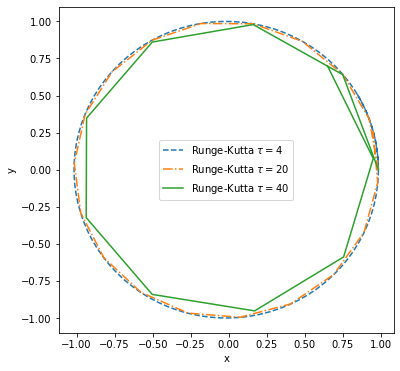

In [40]:
plt.figure(figsize=(6,6))
plt.plot(xrk_4,yrk_4,'--',label=r'Runge-Kutta $\tau=4$')
plt.plot(xrk_20,yrk_20,'-.',label=r'Runge-Kutta $\tau=20$')
plt.plot(xrk_40,yrk_40,label=r'Runge-Kutta $\tau=40$')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

<font  face=Times color=darkblue size=3> We see that for this method, the error will not increase with time but with the time-step.

### Comparison

Text(0, 0.5, 'y')

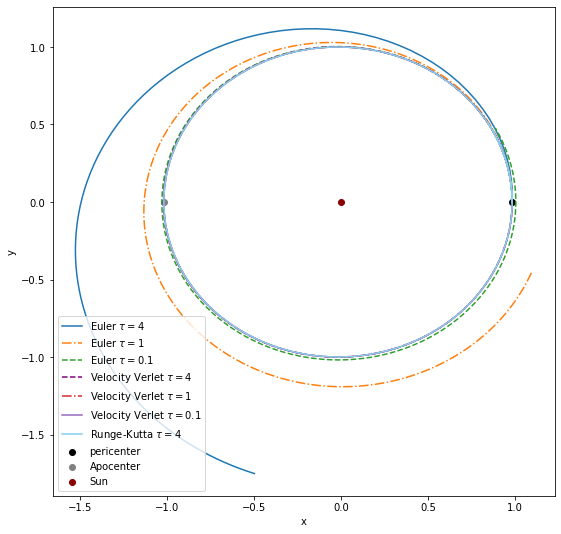

In [41]:
plt.figure(figsize=(9,9))
plt.plot(x_eu2,y_eu2,'-',label=r'Euler $\tau=4$')
plt.plot(x_eu,y_eu,'-.',label=r'Euler $\tau=1$')
plt.plot(x_eu1,y_eu1,'--',label=r'Euler $\tau=0.1$')
plt.plot(x_vv_tau4,y_vv_tau4,'--',color='purple',label=r'Velocity Verlet $\tau=4$')
plt.plot(x_vv_tau1,y_vv_tau1,'-.',label=r'Velocity Verlet $\tau=1$')
plt.plot(x_vv_tauP1,y_vv_tauP1,'-',label=r'Velocity Verlet $\tau=0.1$')
plt.plot(xrk_4,yrk_4,color='skyblue',label=r'Runge-Kutta $\tau=4$')
plt.scatter([1.00000011*(1-0.01671022)],[0],color='black',label='pericenter')
plt.scatter([-1.00000011*(1+0.01671022)],[0],color='gray',label='Apocenter')
plt.scatter([0],[0],color='darkred',label='Sun')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

<font  face=Times color=darkblue size=3> We can see that Runge-Kutta method is the best and the Euler method is the worst.

### Kepler's 2nd law

<font  face=Times color=darkblue size=3> We use Runge-Kutta results to compute the areas swept within equal time. Forget that the angular momentum is constant and the integral of the area can be discretely written as $$\sum_{t_1}^{t_2}\frac{l}{2m}dt,$$ for our numerical method $dt$ is 1 day and $m$ is constant. So we can diretly compute the sum of $\frac{l}{m}=vr$ within equal time to check the 2nd law. 

In [48]:
mu

0.0002958000000000001

In [45]:
tau=1
x_rk=[initial_x]
y_rk=[0]
vx_rk=[0]
vy_rk=[initial_vy]
t_rk=[0]
for i in range(1,400):
    t_rk.append(tau*i)
    k1x=tau*vx_rk[i-1]
    k1y=tau*vy_rk[i-1]
    ax_here1= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*x_rk[i-1]
    ay_here1= (-mu/np.power((x_rk[i-1]**2+y_rk[i-1]**2),1.5))*y_rk[i-1]
    l1x=tau*ax_here1
    l1y=tau*ay_here1
    k2x=tau*(vx_rk[i-1]+0.5*l1x)
    k2y=tau*(vy_rk[i-1]+0.5*l1y)
    ax_here2= (-mu/np.power(((x_rk[i-1]+0.5*k1x)**2+(y_rk[i-1]+0.5*k1y)**2),1.5))*(x_rk[i-1]+0.5*k1x)
    ay_here2= (-mu/np.power(((x_rk[i-1]+0.5*k1x)**2+(y_rk[i-1]+0.5*k1y)**2),1.5))*(y_rk[i-1]+0.5*k1y)
    l2x=tau*ax_here2
    l2y=tau*ay_here2
    k3x=tau*(vx_rk[i-1]+0.5*l2x)
    k3y=tau*(vy_rk[i-1]+0.5*l2y)
    ax_here3= (-mu/np.power(((x_rk[i-1]+0.5*k2x)**2+(y_rk[i-1]+0.5*k2y)**2),1.5))*(x_rk[i-1]+0.5*k2x)
    ay_here3= (-mu/np.power(((x_rk[i-1]+0.5*k2x)**2+(y_rk[i-1]+0.5*k2y)**2),1.5))*(y_rk[i-1]+0.5*k2y)
    l3x=tau*ax_here3
    l3y=tau*ay_here3
    k4x=tau*(vx_rk[i-1]+l3x)
    k4y=tau*(vy_rk[i-1]+l3y)
    ax_here4= (-mu/np.power(((x_rk[i-1]+k3x)**2+(y_rk[i-1]+k3y)**2),1.5))*(x_rk[i-1]+k3x)
    ay_here4= (-mu/np.power(((x_rk[i-1]+k3x)**2+(y_rk[i-1]+k3y)**2),1.5))*(y_rk[i-1]+k3y)
    l4x=tau*ax_here4
    l4y=tau*ay_here4
    x_rk.append(x_rk[i-1]+(1/6)*(k1x+2*k2x+2*k3x+k4x))
    vx_rk.append(vx_rk[i-1]+(1/6)*(l1x+2*l2x+2*l3x+l4x))
    y_rk.append(y_rk[i-1]+(1/6)*(k1y+2*k2y+2*k3y+k4y))
    vy_rk.append(vy_rk[i-1]+(1/6)*(l1y+2*l2y+2*l3y+l4y))

In [46]:
# for example, we examine by taking a period of 20 days:0-20,80-100,180-200,280-300,360-380
list_of_5period=[]
start_time=[1,81,181,281,361]

for j in start_time:
    sum_here=0
    for i in range(j+1,j+21):
        sum_here+=np.sqrt(vx_rk[i]**2+vy_rk[i]**2)*np.sqrt(x_rk[i]**2+y_rk[i]**2)
    list_of_5period.append(sum_here)

In [47]:
list_of_5period


[0.3439310974604349,
 0.3439762750859432,
 0.3439302344478886,
 0.34397256399037385,
 0.34392976635076716]